In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
import sklearn as sk

In [ ]:
df = pd.read_csv("Datasets/diabetes_binary_health_indicators_BRFSS2015.csv")
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
def draw_hist(dataframe):
    for column in dataframe.columns:
        print(column)
        plt.figure()
        dataframe[column].hist()

        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f"Distribution of {column}")
        plt.show()

In [5]:
print(df.info(verbose=True,memory_usage=False))
print("Null values =",df.isnull().values.any())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
print(df.describe())

       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

In [8]:
print(df.head())
print(df.tail())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).


[35346, 218334]


Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4588 ticks ([-50.0, ..., 229300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4588 t

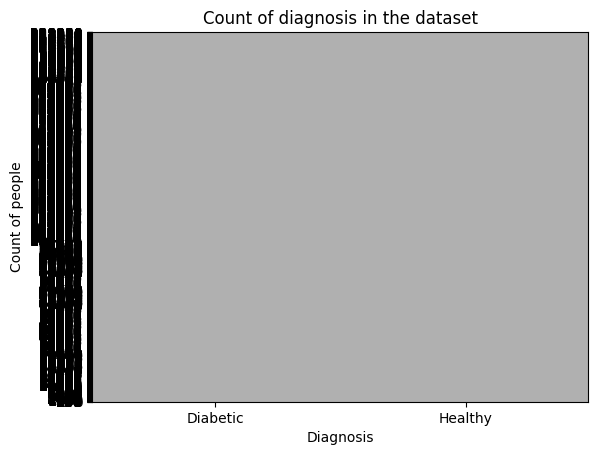

In [10]:

outcomes = ("Diabetic","Healthy")
outcome_counts = [len(df.loc[df['Diabetes_binary']==1]), len(df.loc[df['Diabetes_binary']==0])]
print(outcome_counts)
# display as a graph

colours=['tab:red', 'tab:blue']

fig, ax = plt.subplots()

ax.bar(outcomes, outcome_counts, color=colours)

ax.set_ylabel("Count of people")
ax.set_xlabel("Diagnosis")
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50)) # Y axis increments at 50 
plt.title('Count of diagnosis in the dataset')
plt.grid()
plt.show()